In [1]:
!pip install ecmwflibs
!pip install eccodes
!pip install cfgrib
!pip install xarray
!pip install cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.1/78.1 MB 13.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for findlibs: filename=findlibs-0.0.5-py3-none-any.whl size=6942 sha256=0e9fc3849c2bbaea47f8d2dd198919b0f2385ee9f07cae2f32d6f3b837eedd50
  Stored in directory: /root/.cache/pip/wheels/2e/67/14/22fa5b9fd9c41be520b37e908597d6a262803c0fcf2ba7c2c3
Successfully built findlibs
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 14.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eccodes: filename=eccodes-1.6.1-py3-none-any.whl size=40999 sha256=10c3431d2c8bb815924258d4c9abc810b4b4171ebbb2d8e45983df7307a3e52b
  Stored in directory: /root/.cache/pip/wheels/10/1f/ee/380d51d2c6c97c7677f918c5e45478c9cc23122abf5a273b2c
Successfully built eccodes
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 91.9 MB/s eta 0:00:00


Import modules

In [2]:
import xarray as xr
import matplotlib.pyplot as plt
from datetime import datetime
import cartopy.crs as ccrs
%matplotlib inline

Define some variables needed for the script.

In [3]:
members = [
    "gec00", "gep01", "gep02", "gep03", "gep04", "gep05",
    "gep06", "gep07", "gep08", "gep09", "gep10",
    "gep11", "gep12", "gep13", "gep14", "gep15",
    "gep16", "gep17", "gep18", "gep19", "gep20",
    "gep21", "gep22", "gep23", "gep24", "gep25",
    "gep26", "gep27", "gep28", "gep29", "gep30"
]
# ftimes = ["{:03d}".format(i) for i in range(0, 9, 3)]  # forecast times
ftime = "003"
init_date = datetime(2023, 11, 30, 12)  # model initial time, year month date hour
local_dir = f"mslp/{init_date:%Y%m%d%H}"

From this part we are going to see the data and make sample plot

In [22]:
member = "gec00" # Change the member if needed
filename = f"{member}.t{init_date:%H}z.pgrb2s.0p25.f{ftime}.grb2"
ds = xr.open_dataset(f"{local_dir}/{filename}",engine="cfgrib")
ds

<xarray.Dataset>
Dimensions:     (latitude: 201, longitude: 225)
Coordinates:
    number      int64 ...
    time        datetime64[ns] ...
    step        timedelta64[ns] ...
    meanSea     float64 ...
  * latitude    (latitude) float64 -25.0 -24.75 -24.5 -24.25 ... 24.5 24.75 25.0
  * longitude   (longitude) float64 94.0 94.25 94.5 94.75 ... 149.5 149.8 150.0
    valid_time  datetime64[ns] ...
Data variables:
    prmsl       (latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          2
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    history:                 2023-12-03T14:53 GRIB to CDM+CF via cfgrib-0.9.1...

Because the file only contain MSLP variable, then we only have one variable inside it. See that prmsl unit is in Pascal. We are going to convert it to hPa by dividing it by 100.
We also need to take latitude and longitude information.

In [23]:
data = ds["prmsl"]/100
lons = ds.longitude.values
lats = ds.latitude.values

Now we can start to design the plot.

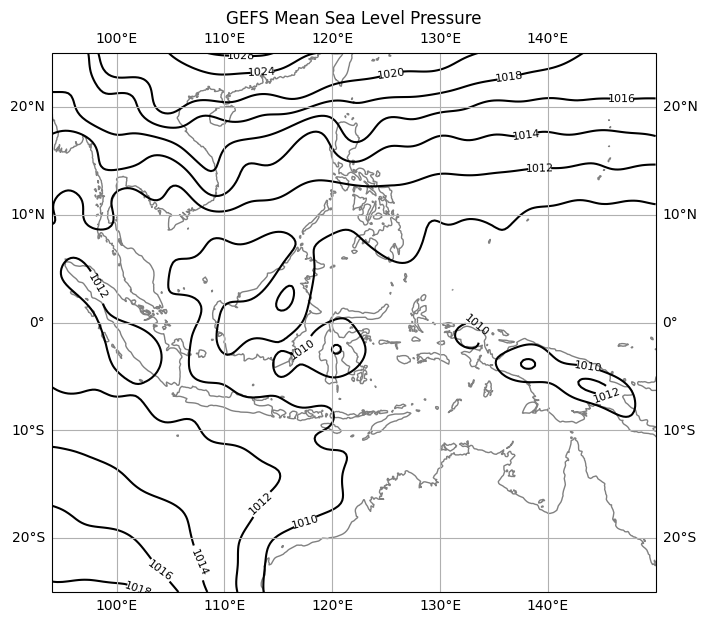

In [27]:
# Initiate figure and axes instance
fig, ax = plt.subplots(1, 1, figsize=(13, 7), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot the data as contour
levels = [1010,1012,1014,1016,1018,1020,1024,1028] # Define the levels here
contour = ax.contour(lons, lats, data, transform=ccrs.PlateCarree(), colors='black', levels=levels)

# Add contour labels
ax.clabel(contour, inline=True, fontsize=8)

# Add coastlines
ax.coastlines(color='gray', edgecolor='gray')

# Add titles
ax.set_title('GEFS Mean Sea Level Pressure')

# Add gridlines and labels
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
ax.set_xlabel('Longitude',fontsize=5)
ax.set_ylabel('Latitude',fontsize=5)

# Save the image
plt.savefig("test_result.png")

Once you are happy with the design, we need to incorporate the codes into one block, and loops through the members.

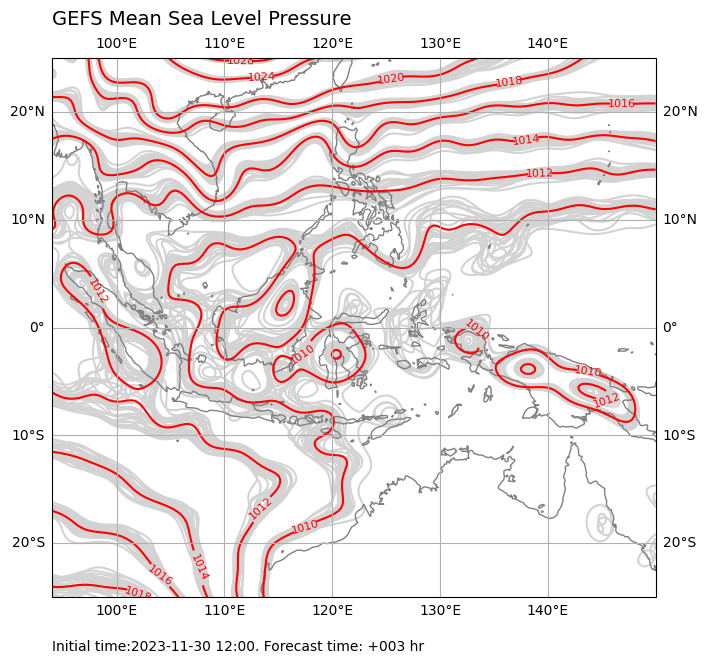

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(13, 7), subplot_kw={'projection': ccrs.PlateCarree()})
# Loop through member
for member in members:
  filename = f"{member}.t{init_date:%H}z.pgrb2s.0p25.f{ftime}.grb2"
  ds = xr.open_dataset(f"{local_dir}/{filename}",engine="cfgrib")
  data = ds["prmsl"]/100
  lons = ds.longitude.values
  lats = ds.latitude.values
  levels = [1010,1012,1014,1016,1018,1020,1024,1028] # Define the levels here

  # Make the control run contour red
  if member == "gec00":
    contour = ax.contour(lons, lats, data, transform=ccrs.PlateCarree(), colors='red',zorder=2,levels=levels)
    # Add contour labels
    ax.clabel(contour, inline=True, fontsize=8)
  else:
    contour = ax.contour(lons, lats, data, transform=ccrs.PlateCarree(), colors='lightgray',zorder=1,levels=levels)

# Add coastlines
ax.coastlines(color='gray', edgecolor='gray')

# Add titles
title = ax.set_title('GEFS Mean Sea Level Pressure',x=0, y=1.0, pad=24, fontsize=14, ha="left")

# Add information text
ax.text(0, -0.1, f"Initial time:{init_date:%Y-%m-%d %H:%M}. Forecast time: +{ftime} hr", transform=ax.transAxes, fontsize=10, ha="left")

# Add gridlines and labels
ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.savefig(f"mslp_{init_date:%Y%m%d%H}_{ftime}.png",dpi=200,bbox_inches='tight')

Now it's your turn:
1. Try to loop through forecast time.

In [28]:
# Type Your Code Here

## Calculate mean value

Calculating mean value involve several steps. You need to take subset of the data, appending it into an array, then calculate the mean.
Xarray is the best module to make it simpler.

In [13]:
#Make empty list to hold data
data_holder = []
#Loop through members and take the subset
for member in members:
  filename = f"{member}.t{init_date:%H}z.pgrb2s.0p25.f{ftime}.grb2"
  ds = xr.open_dataset(f"{local_dir}/{filename}",engine="cfgrib")
  ds = ds/100 #convert to hectopascal
  data_holder.append(ds)

Check data_holder

In [ ]:
data_holder

Concatenate data into one dataset and calculate the mean

In [25]:
combined_data = xr.concat(data_holder, dim='number')
ensemble_mean = combined_data.mean()

Now it's your turn:
1. Plot the ensemble mean together with the control member. Hint: you can copy the codes from design process.

In [ ]:
# Type Your Code Here